# Bank marketing UCI EDA

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [141]:
def read_data(path: str, files: list):
    dataframes = []
    for file in files:
        dataframes.append(pd.read_csv(path + file, sep=';'))
    return dataframes


path = '../data/bank/'
files = ['bank-full.csv']
bank_data = read_data(path, files)[0]

### General

In [103]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [104]:
bank_data.shape

(45211, 17)

* Let's check missing values

In [105]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

* No missing values

* Let's check duplicates and remove them if there are some

In [106]:
bank_data.duplicated().sum()

0

* No duplicates

In [107]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Distributions

* Age

In [109]:
def create_hist(feature, minimum=-np.inf, maximum=np.inf):
    fig = plt.figure(figsize=(15, 7))
    plt.style.use('seaborn-deep')
    plt.hist(bank_data[(bank_data['y'] == 1) & (bank_data[feature] >= minimum) & (bank_data[feature] <= maximum)][feature], 
             alpha=0.9, label='y=1', bins=35)
    plt.hist(bank_data[(bank_data['y'] == 0) & (bank_data[feature] >= minimum) & (bank_data[feature] <= maximum)][feature], 
             alpha=0.6, label='y=0', bins=35)
    plt.legend(loc='upper right')
    plt.title('{} distribution'.format(feature.capitalize()))

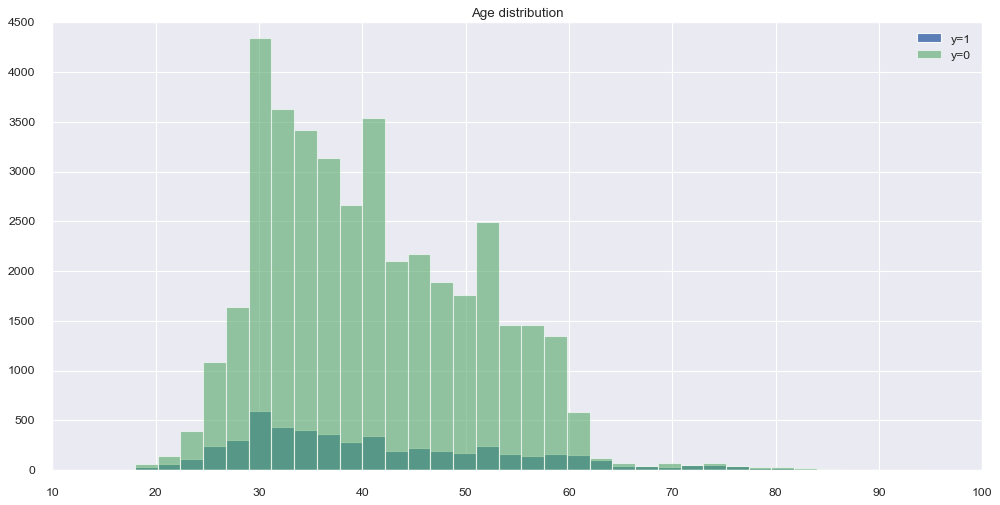

In [110]:
create_hist('age', 18, 100)

* Balance

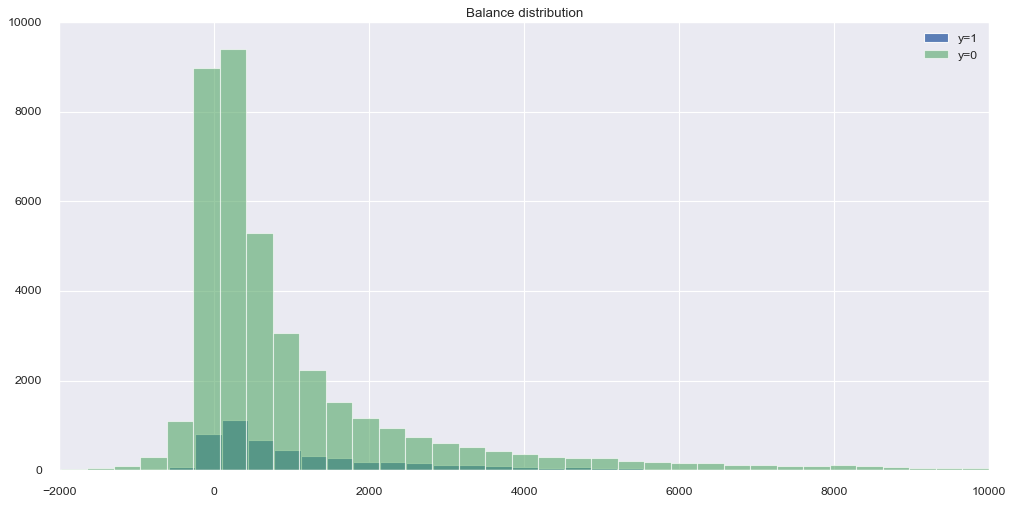

In [111]:
create_hist('balance', -2000, 10000)

* Duration

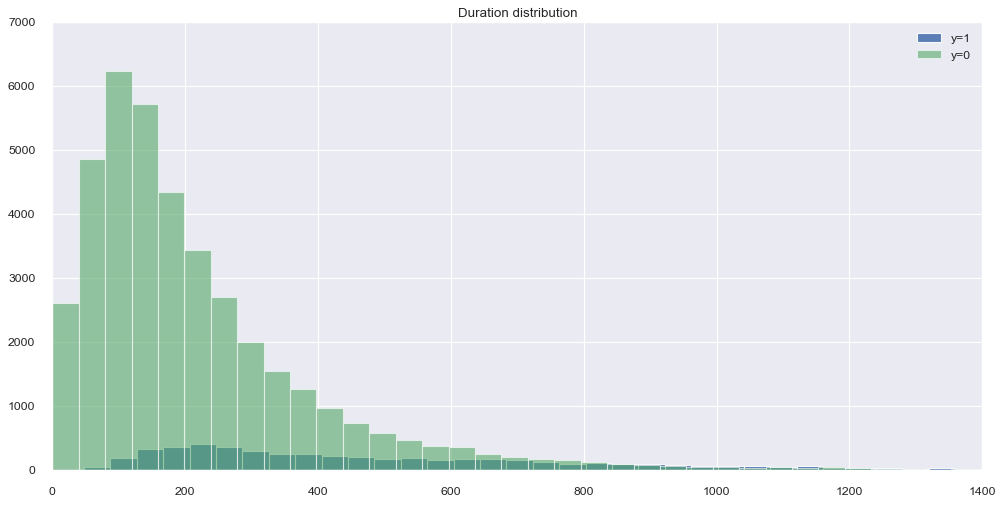

In [112]:
create_hist('duration', 0, 1400)

In [113]:
def create_barplot(feature):
    sns.set(style="darkgrid")
    plt.figure(figsize=(15, 7))

    total = bank_data.groupby(feature).count().reset_index()
    bar1 = sns.barplot(x=feature, y='y', data=total, color='darkblue')

    subscribed = bank_data[bank_data['y'] == 1].groupby(feature).count().reset_index()
    bar2 = sns.barplot(x=feature, y='y', data=subscribed, color='lightblue')

    top_bar = mpatches.Patch(color='darkblue', label='y=0')
    bottom_bar = mpatches.Patch(color='lightblue', label='y=1')
    plt.legend(handles=[top_bar, bottom_bar])
    plt.ylabel('Number')
    plt.title('{} distribution'.format(feature.capitalize()))
    plt.show()

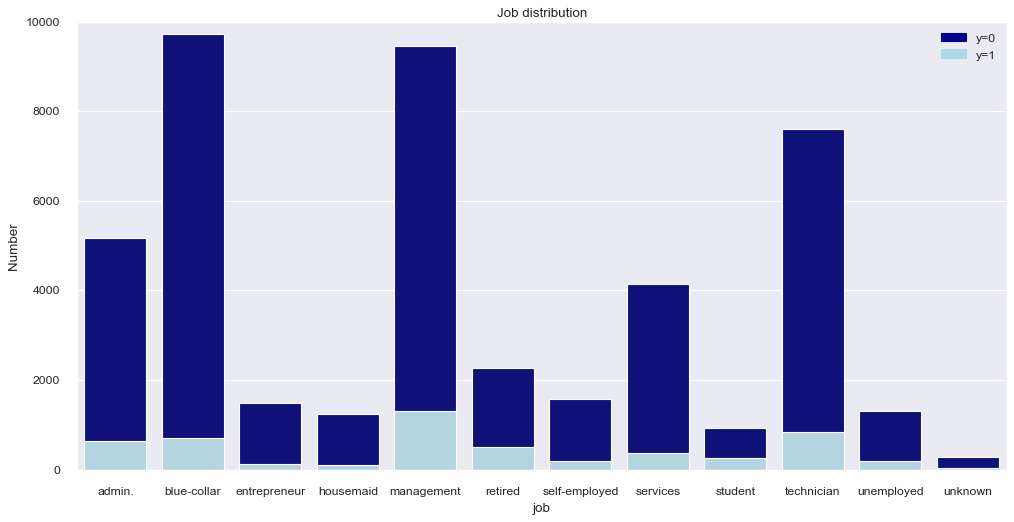

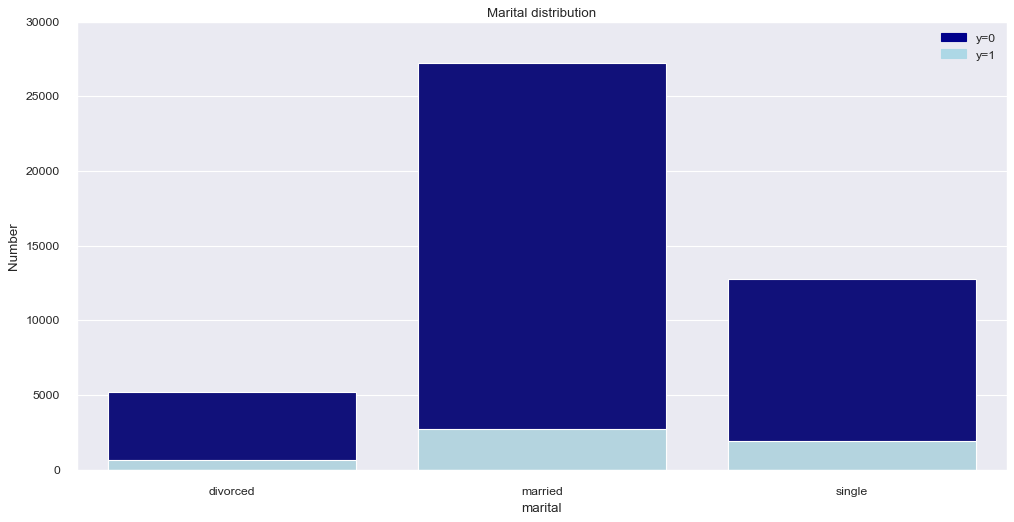

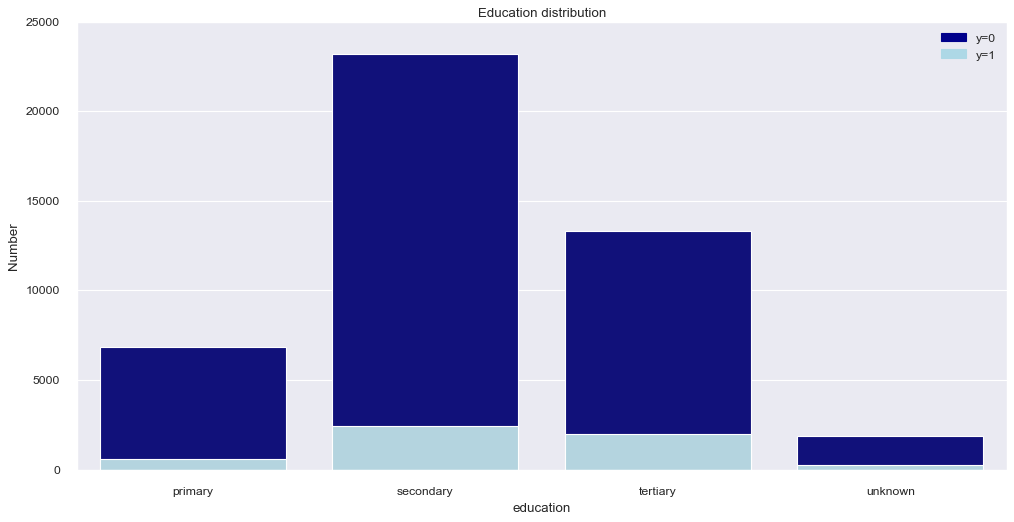

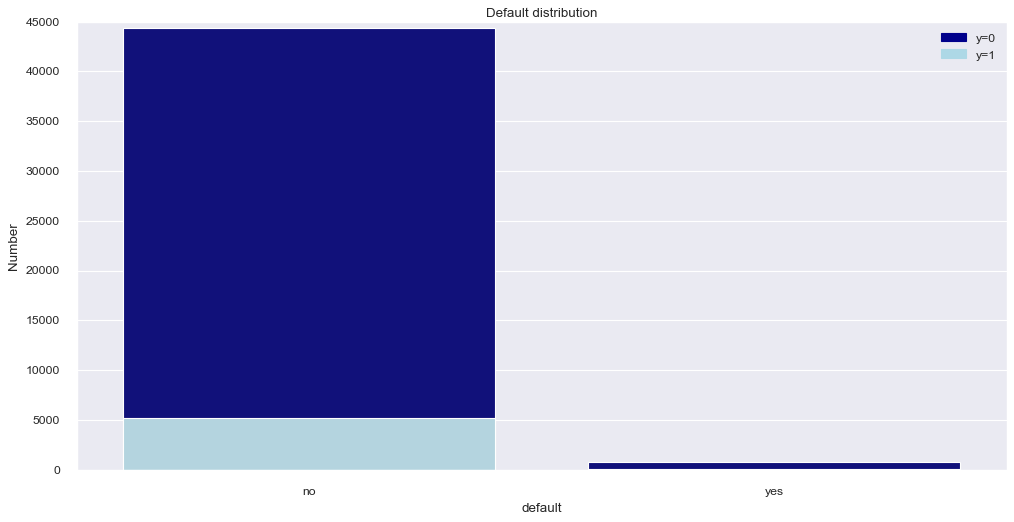

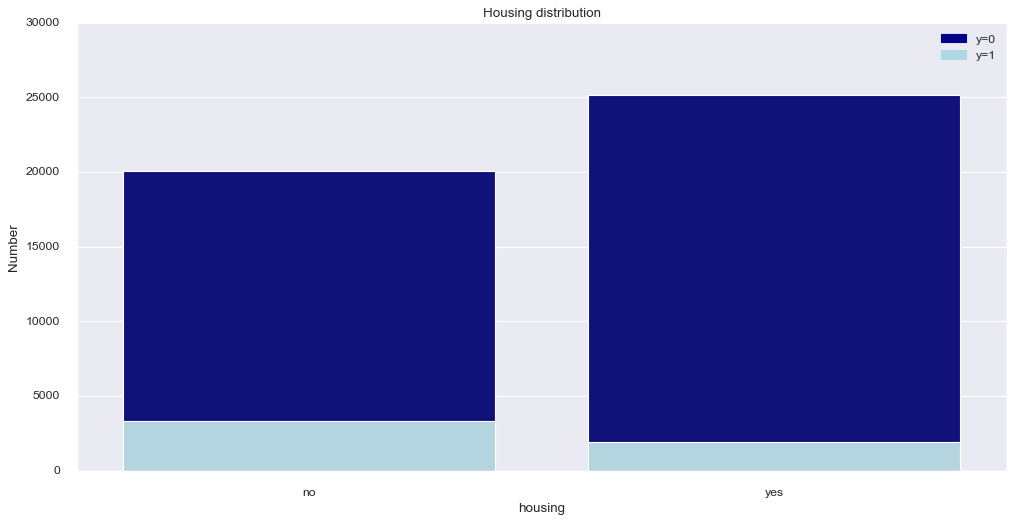

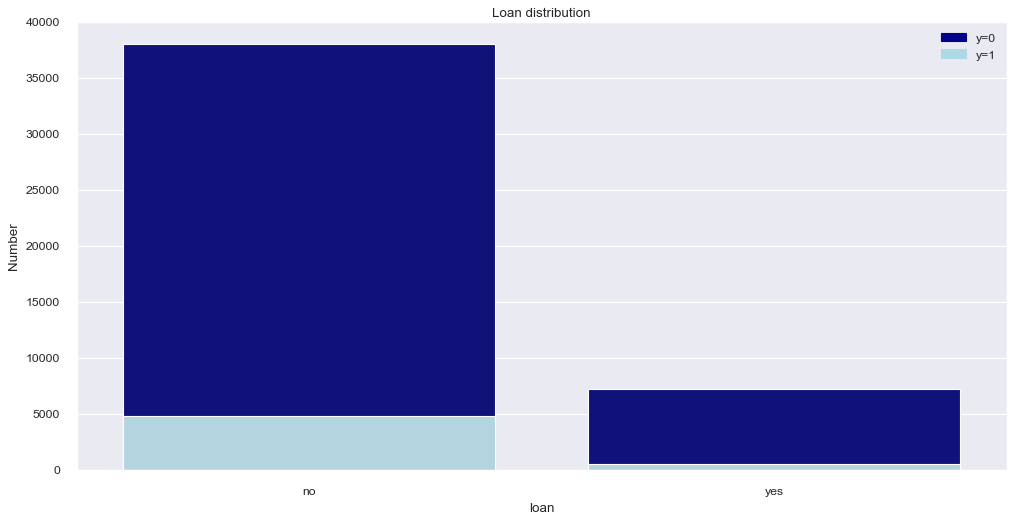

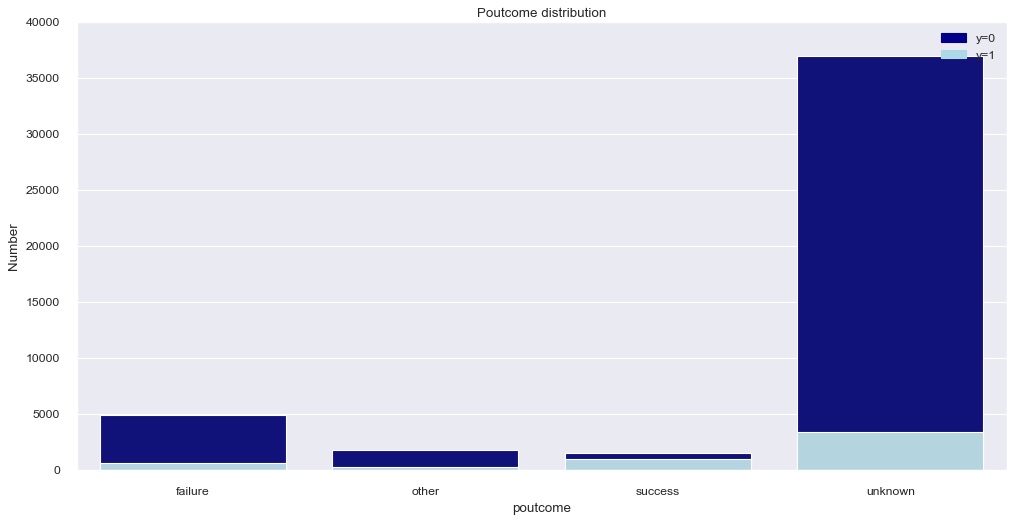

In [114]:
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']
for cat in categorical:
    create_barplot(cat)

In [115]:
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [142]:
def encode_bool(features, data):
    for feature in features:
        data[feature] = data[feature].map({'yes': 1, 'no': 0})
    display(data.sample(5))

    
bool_features = ['default', 'housing', 'loan', 'y']
encode_bool(bool_features, bank_data)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2902,54,retired,married,secondary,0,918,1,0,unknown,14,may,189,1,-1,0,unknown,0
31261,83,retired,divorced,primary,0,1097,0,0,telephone,5,mar,181,1,-1,0,unknown,1
22053,59,entrepreneur,married,tertiary,0,-23,0,1,cellular,20,aug,195,7,-1,0,unknown,0
17172,37,blue-collar,married,secondary,0,965,1,0,cellular,28,jul,119,4,-1,0,unknown,0
23655,35,technician,married,tertiary,0,75,0,0,cellular,28,aug,9,19,-1,0,unknown,0


In [143]:
def encode_categorical(features, data):
    for feature in features:
        data = pd.concat([data.drop(feature, axis=1), pd.get_dummies(data[feature], prefix=feature, prefix_sep='_',
                                                                     drop_first=True, dummy_na=False)], axis=1)
    display(data.sample(5))
    return data
        
        
cat_features = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
bank_data = encode_categorical(cat_features, bank_data)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
20439,49,0,300,0,0,12,76,2,-1,0,...,0,0,0,0,0,0,0,0,0,1
17464,47,0,912,0,0,28,118,9,-1,0,...,1,0,0,0,0,0,0,0,0,1
10292,40,0,2252,0,0,12,144,1,-1,0,...,0,1,0,0,0,0,0,0,0,1
9228,57,0,3277,0,0,5,127,4,-1,0,...,0,1,0,0,0,0,0,0,0,1
9555,59,0,444,1,0,6,137,1,-1,0,...,0,1,0,0,0,0,0,0,0,1


In [136]:
X = bank_data.drop(columns='y')
y = bank_data['y']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3 , random_state=42)

rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_valid)
print('Accuracy score for rf: ', accuracy_score(y_valid, y_pred))

Accuracy score for rf:  0.9072544971984665
